In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil



In [154]:
def dateparse(x):
    return pd.datetime.strptime(x, '%Y-%m')

data = pd.read_csv('input/drug_purchases.csv', parse_dates=['purchase_date'])

# Convert date from string to date times
data[['purchase_month']] = data['purchase_date'].apply(lambda x: pd.Series(x.strftime("%Y-%m")))
data[['purchase_year']] = data['purchase_date'].apply(lambda x: pd.Series(x.strftime("%Y")))


# display(data.dtypes);
data.head()

,id,log_id,layout_id,staging_record_id,created_by,created_at,modified_by,modified_at,deleted,address,...,unit_price,drug_name,drug_class,state,drug_indication,person_code,pharmacy,zip,purchase_month,purchase_year
0,410,46,87,595,SYSTEM,2018-10-08 21:30:06,SYSTEM,2018-10-08 21:30:06,False,5208 98TH ST,...,0.1327,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,TX,Ulcer,17546398,CVS PHARMACY,79424,2016-01,2016
1,2387,46,87,2612,SYSTEM,2018-10-08 21:30:27,SYSTEM,2018-10-08 21:30:27,False,251 N BROADWAY,...,0.2450,PREDNISONE TAB 10MG,CORTICOSTEROIDS,NJ,Inflammation,17427509,SAVON PHARMACY,8070,2016-01,2016
2,2411,46,87,2587,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,2040 ROUTE 130,...,0.2734,ATORVASTATIN TAB 10MG,ANTIHYPERLIPIDEMICS,NJ,High Cholesterol,17112961,EXPRESS SCRIPTS,80169716,2016-01,2016
3,2436,46,87,2565,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,5230 DALLAS HWY,...,304.5100,TUDORZA PRES AER 400/ACT,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,GA,Asthma,17427513,WALGREENS #6325,30127,2016-01,2016
4,2461,46,87,2540,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,1704 W HILLSBOROUGH,...,0.1813,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,FL,Ulcer,17106797,WALGREENS #6611,33603,2016-01,2016


In [155]:
from fbprophet import Prophet

m_df = data[['purchase_month', 'unit_price']]


m_df = pd.DataFrame({'unit_price' : m_df.groupby(["purchase_month"])['unit_price'].sum()}).reset_index()

display(m_df.dtypes)

# m_df['purchase_month'] = m_df['purchase_month'].apply(dateutil.parser.parse, dayfirst=True)

m_df1 = m_df.copy()
m_df1.rename(columns={'purchase_month': 'ds',
                   'unit_price': 'y'},
          inplace=True)

m_df1.head()


purchase_month     object
unit_price        float64
dtype: object

,ds,y
0,2016-01,61704.4785
1,2016-02,71601.1962
2,2016-03,78170.8829
3,2016-04,103794.4647
4,2016-05,105521.8570


In [158]:
m = Prophet()
m.fit(m_df1)
m_forecast = m.make_future_dataframe(periods=365, freq='D')
m_forecast = m.predict(m_forecast)

display(m_forecast.head())
display(m_forecast.tail())

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,76341.383731,42529.418921,88151.960135,76341.383731,76341.383731,-11126.972294,-11126.972294,-11126.972294,-11126.972294,-11126.972294,-11126.972294,0.0,0.0,0.0,65214.411437
1,2016-02-01,77559.801449,43205.200299,88317.772290,77559.801449,77559.801449,-11108.883463,-11108.883463,-11108.883463,-11108.883463,-11108.883463,-11108.883463,0.0,0.0,0.0,66450.917986
2,2016-03-01,78699.611546,63207.930891,108564.901901,78699.611546,78699.611546,7561.680325,7561.680325,7561.680325,7561.680325,7561.680325,7561.680325,0.0,0.0,0.0,86261.291871
3,2016-04-01,79918.029287,66998.714837,112878.828531,79918.029287,79918.029287,9319.298215,9319.298215,9319.298215,9319.298215,9319.298215,9319.298215,0.0,0.0,0.0,89237.327502
4,2016-05-01,81097.143236,70803.933550,117745.771983,81097.143236,81097.143236,13911.850279,13911.850279,13911.850279,13911.850279,13911.850279,13911.850279,0.0,0.0,0.0,95008.993516


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
393,2019-08-28,128812.179510,104810.240039,147068.913715,128812.162931,128812.194970,-2455.047990,-2455.047990,-2455.047990,-2455.047990,-2455.047990,-2455.047990,0.0,0.0,0.0,126357.131520
394,2019-08-29,128851.483619,103822.079420,149530.072239,128851.466965,128851.499152,-2753.101397,-2753.101397,-2753.101397,-2753.101397,-2753.101397,-2753.101397,0.0,0.0,0.0,126098.382222
395,2019-08-30,128890.787728,101387.651014,148080.756960,128890.770999,128890.803323,-3013.362119,-3013.362119,-3013.362119,-3013.362119,-3013.362119,-3013.362119,0.0,0.0,0.0,125877.425610
396,2019-08-31,128930.091837,103384.274464,147822.702533,128930.075033,128930.107519,-3235.231507,-3235.231507,-3235.231507,-3235.231507,-3235.231507,-3235.231507,0.0,0.0,0.0,125694.860330
397,2019-09-01,128969.395947,103555.091099,148452.338451,128969.379067,128969.411706,-3416.862429,-3416.862429,-3416.862429,-3416.862429,-3416.862429,-3416.862429,0.0,0.0,0.0,125552.533517


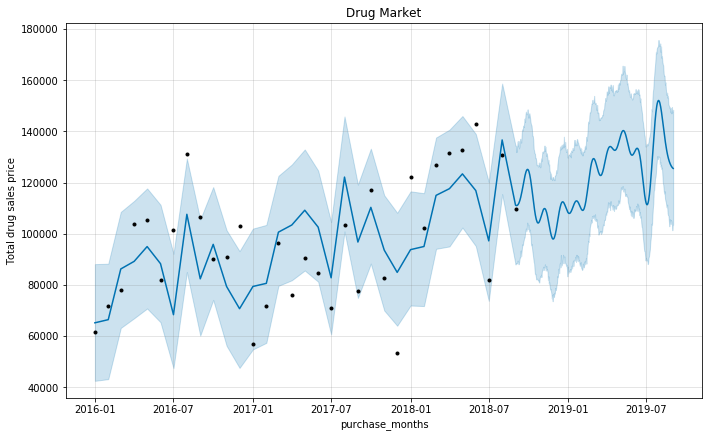

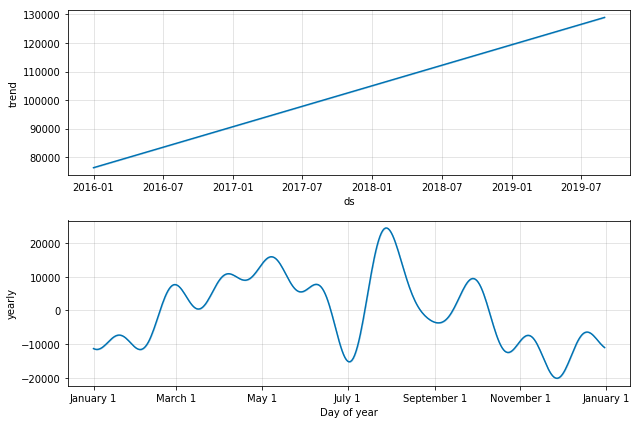

In [159]:
fig = m.plot(m_forecast, xlabel='purchase_months', ylabel='Total drug sales price')
plt.title('Drug Market')
plt.show()

m.plot_components(m_forecast)
plt.show()

In [160]:
# How many rows the dataset
data['id'].count()

184250

In [109]:
# What was the highest unit_price?
data['unit_price'].max()

32032.06

In [110]:
# How many entries are there for each month?
data['drug_indication'].value_counts();

In [111]:
data['drug_class'].value_counts();

In [112]:
data['person_code'].value_counts();

In [113]:
data['pharmacy'].value_counts();

In [114]:
data['state'].value_counts();

In [115]:
data.groupby(['person_code', 'pharmacy'])['id'].count();


In [116]:
data.groupby(['state', 'pharmacy'])['purchase_date'].count();

In [117]:
data['purchase_date'].value_counts();

In [118]:
data['purchase_month'].value_counts();

In [119]:
data.groupby(['drug_class', 'purchase_month'])['id'].count();

In [120]:
data.groupby(['state', 'purchase_month'])['id'].count();

In [121]:
grouped = data.groupby(['state', 'purchase_month'])['id'].count().reset_index(name='count').sort_values(['state','count'], ascending=[True, False]).groupby('state').head(5)
grouped;

In [122]:
data.groupby(['person_code', 'purchase_month'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['person_code','count', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('person_code').head(5);


In [125]:
data.groupby(['state', 'purchase_month'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['state','count', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('state').head(5);


In [126]:
data.groupby(['state', 'purchase_year'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['state','count', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('state').head(5);


In [146]:
data.groupby(['person_code', 'purchase_year'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['person_code','count', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('person_code').head(5);
